In [2]:
import pandas as pd

In [3]:
import torch
import torchvision
from torchvision import datasets,transforms
import numpy as np
import matplotlib.pyplot as plt

In [4]:
transformAug = transforms.Compose([
    transforms.Resize(224),  # Resize image to 224x224 pixels
    transforms.CenterCrop(224),  # Crop the center of the image
    transforms.ColorJitter(brightness=2),  # Randomly adjust brightness
    transforms.RandomVerticalFlip(p=0.5),  # Random vertical flip
    transforms.RandomHorizontalFlip(p=0.5),  # Random horizontal flip
    transforms.RandomResizedCrop(size=(224, 224), antialias=True),  # Random crop and resize
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize pixel values
])

transform = transforms.Compose([
    transforms.CenterCrop(224),  # Crop the center of the image
    transforms.Resize(224),  # Resize image to 224x224 pixels
    transforms.ToTensor()  # Convert image to tensor
])


In [5]:
# Load training dataset with specified transformations
train_ds = datasets.ImageFolder('/kaggle/input/breast-cancer-mri/train',transform=transformAug)

test_ds = datasets.ImageFolder('/kaggle/input/breast-cancer-mri/test', transform=transform)

val_ds = datasets.ImageFolder('/kaggle/input/breast-cancer-mri/val',transform=transform)


In [6]:
batch_size = 32  # Set the number of samples to be processed in each training/test batch


In [7]:
# DataLoader for the training dataset
trainloader = torch.utils.data.DataLoader(train_ds,  # Training dataset
                                           batch_size=batch_size,  # Samples per batch
                                           shuffle=True,  # Shuffle data
                                           num_workers=2)  # Data loading processes

# DataLoader for the testing dataset
testloader = torch.utils.data.DataLoader(test_ds,  # Testing dataset
                                          batch_size=batch_size,  # Samples per batch
                                          shuffle=True,  # Shuffle data
                                          num_workers=2)  # Data loading processes

# DataLoader for the validation dataset
valloader = torch.utils.data.DataLoader(val_ds,  # Validation dataset
                                         batch_size=batch_size,  # Samples per batch
                                         shuffle=True,  # Shuffle data
                                         num_workers=2)  # Data loading processes


In [8]:
# List of class labels for the dataset
classes = ['Malignant', 'Benign']  # Class 0: Malignant, Class 1: Benign

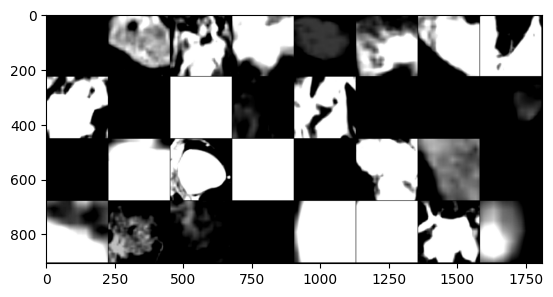

Benign Benign Benign Malignant Benign Benign Malignant Benign Benign Benign Benign Benign Benign Benign Benign Benign Benign Malignant Malignant Benign Malignant Benign Malignant Benign Malignant Benign Benign Benign Malignant Benign Benign Malignant


In [9]:
def imshow(img):
    npimg = img.numpy()  # Convert tensor to NumPy array
    plt.imshow(np.transpose(npimg, (1, 2, 0)))  # Transpose and display the image
    plt.show()  # Show the image

dataiter = iter(trainloader)  # Create an iterator for the data loader
images, labels = next(dataiter)  # Get the next batch of images and labels

imshow(torchvision.utils.make_grid(images))  # Display a grid of images
print(' '.join(f'{classes[labels[j]]:5}' for j in range(batch_size)))  # Print class labels


In [10]:
from collections import Counter

# Count the occurrences of each class label in the training dataset
class_counts = dict(Counter(sample[1] for sample in train_ds.imgs))  # sample[1] retrieves the label for each image
print(class_counts)  # Print the dictionary of class counts

{0: 5559, 1: 14875}


In [11]:
from collections import Counter

# Count the occurrences of each class label in the test dataset
class_counts = dict(Counter(sample[1] for sample in test_ds.imgs))  # sample[1] retrieves the label for each image
print(class_counts)  # Print the dictionary of class counts

{0: 1938, 1: 4913}


In [12]:
from collections import Counter

# Count the occurrences of each class label in the value dataset
class_counts = dict(Counter(sample[1] for sample in val_ds.imgs))  # sample[1] retrieves the label for each image
print(class_counts)  # Print the dictionary of class counts

{0: 408, 1: 1581}


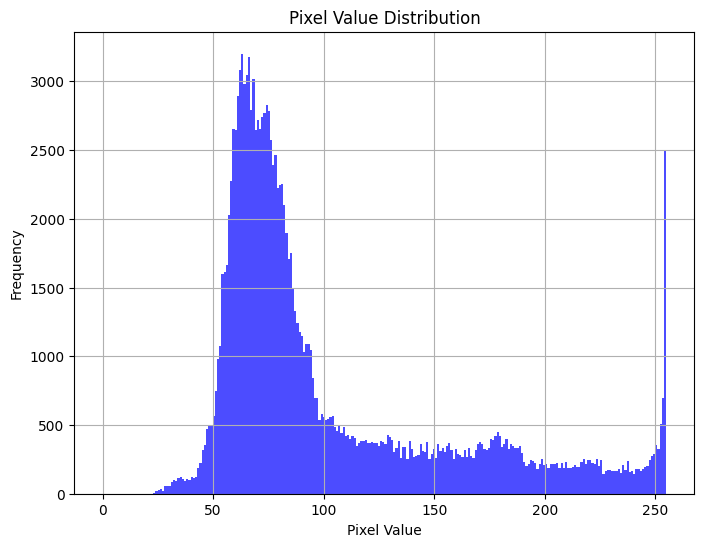

In [13]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Define the path to the specific image
image_path = r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-2106/SUB6/p-067.jpg"

# Load the image
image = Image.open(image_path)

# Resize the image to 224x224
image = image.resize((224, 224))

# Ensure the image is in RGB format
image = image.convert('RGB')

# Convert the image to a NumPy array
image_array = np.array(image)

# Flatten the image into a 1D array (for easier plotting of pixel values)
flat_image_array = image_array.flatten()

# Plotting the histogram of pixel values
plt.figure(figsize=(8, 6))
plt.hist(flat_image_array, bins=256, range=(0, 255), color='blue', alpha=0.7)
plt.title('Pixel Value Distribution')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


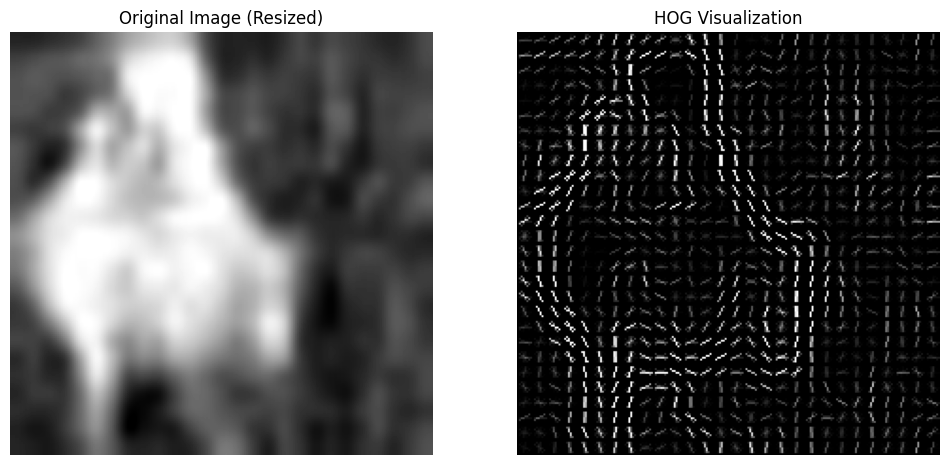

Shape of HOG Features: (26244,)


In [14]:
# Import necessary libraries
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage.feature import hog
from skimage import exposure
from skimage.color import rgb2gray

# Specify the path to the image file
image_path = "/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-1803/SUB4/p-046.jpg"

# Load the image using the PIL library
image = Image.open(image_path)

# Step 1: Resize the image to a fixed dimension of 224x224 pixels
image = image.resize((224, 224))  # Adjust the image size

# Convert the resized image to a NumPy array for further processing
image_array = np.array(image)

# Step 2: Ensure the image is in grayscale format
if image_array.ndim == 3:
    # Convert RGB images to grayscale using skimage's rgb2gray function
    gray_image = rgb2gray(image_array)
else:
    # Use the image directly if it is already in grayscale
    gray_image = image_array

# Step 3: Extract HOG (Histogram of Oriented Gradients) features from the grayscale image
hog_features, hog_image = hog(
    gray_image,
    orientations=9,               # Number of gradient orientations
    pixels_per_cell=(8, 8),       # Size of each cell in pixels
    cells_per_block=(2, 2),       # Number of cells per block for normalization
    block_norm='L2-Hys',          # Block normalization technique
    visualize=True,               # Produce HOG image for visualization
    feature_vector=True           # Generate HOG feature vector
)

# Enhance the HOG image for better visualization by rescaling intensity
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

# Step 4: Plot the original grayscale image alongside the HOG visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)

# Display the original grayscale image
ax1.axis("off")
ax1.imshow(gray_image, cmap=plt.cm.gray)
ax1.set_title("Original Image (Resized)")

# Display the HOG image
ax2.axis("off")
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title("HOG Visualization")

# Show the combined plots
plt.show()

# Output the shape of the HOG feature vector for verification
print("Shape of HOG Features:", hog_features.shape)


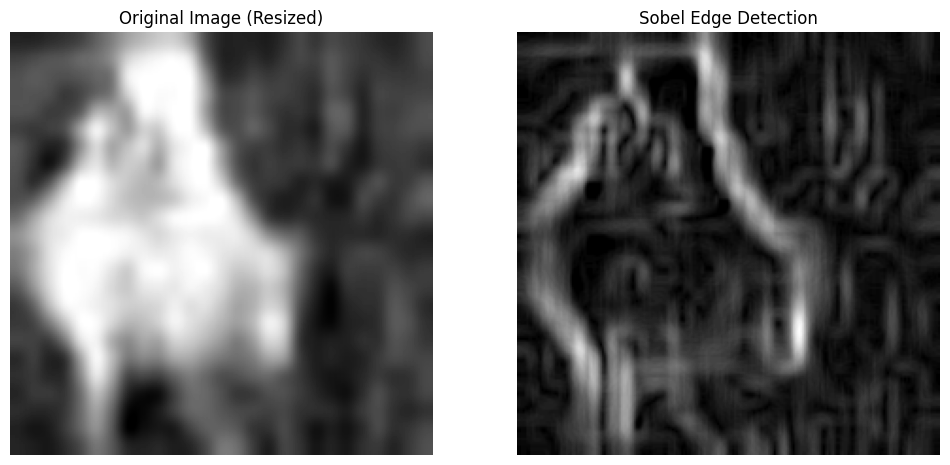

In [15]:
import os
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from skimage import filters
from skimage.color import rgb2gray

# Specify the path to the image file
image_path = "/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-1803/SUB4/p-046.jpg"

# Load the image using the PIL library
image = Image.open(image_path)

# Step 1: Resize the image to a fixed dimension of 224x224 pixels
image = image.resize((224, 224))  # Adjust the image size
# Convert the resized image to a NumPy array for further processing
image_array = np.array(image)

# Step 2: Ensure the image is in grayscale format
if image_array.ndim == 3:
    # Convert RGB images to grayscale using skimage's rgb2gray function
    gray_image = rgb2gray(image_array)
else:
    # Use the image directly if it is already in grayscale
    gray_image = image_array

# Step 3: Apply Sobel edge detection
sobel_edges = filters.sobel(gray_image)

# Step 4: Plot the original grayscale image and Sobel edge detection result
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
# Display the original grayscale image
ax1.axis("off")
ax1.imshow(gray_image, cmap=plt.cm.gray)
ax1.set_title("Original Image (Resized)")
# Display the Sobel edge detection image
ax2.axis("off")
ax2.imshow(sobel_edges, cmap=plt.cm.gray)
ax2.set_title("Sobel Edge Detection")
# Show the combined plots
plt.show()


In [16]:
import numpy as np

image = np.array([ 
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

kernel = np.array([
    [1, 0], 
    [0, -1]
])

feature_map = np.array([
    [-4, -4],
    [-4, -4]
])

Sobel_x_operator = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

def convolve(image, kernel):
    image_x, image_y = image.shape
    kernel_x, kernel_y = kernel.shape
    
    # Kernel radius
    height_radius, width_radius = np.array(kernel.shape) // 2
    
    # Output dimensions
    stride = 1
    padding = 0
    output_x = int(((image_x - kernel_x + 2 * padding) // stride) + 1)
    output_y = int(((image_y - kernel_y + 2 * padding) // stride) + 1)
    
    print("Output x dimension:", output_x)
    print("Output y dimension:", output_y)
    
    # Initialize output feature map
    output = np.zeros((output_x, output_y))
    
    # Apply convolution
    for i in range(output_x):
        for j in range(output_y):
            # Extract the region of interest from the input image
            region = image[i:i + kernel_x, j:j + kernel_y]
            
            # Element-wise multiplication and summation
            output[i, j] = np.sum(region * kernel)
    
    return output

# Test the function
output = convolve(image, kernel)
print("Convolved Output:\n", output)


Output x dimension: 2
Output y dimension: 2
Convolved Output:
 [[-4. -4.]
 [-4. -4.]]


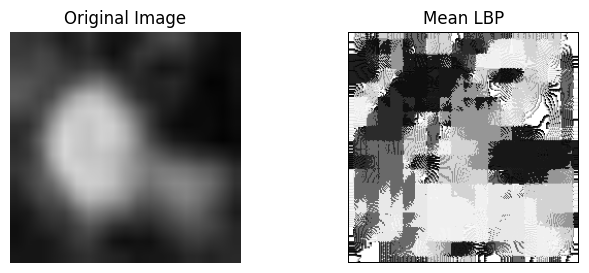

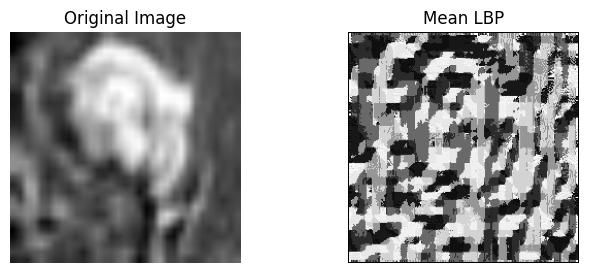

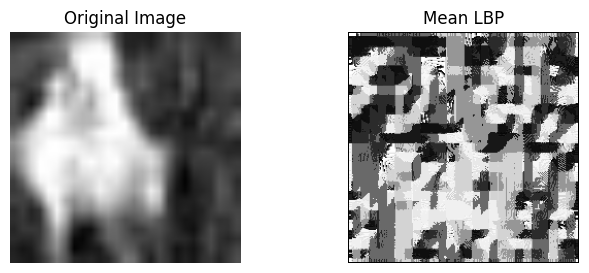

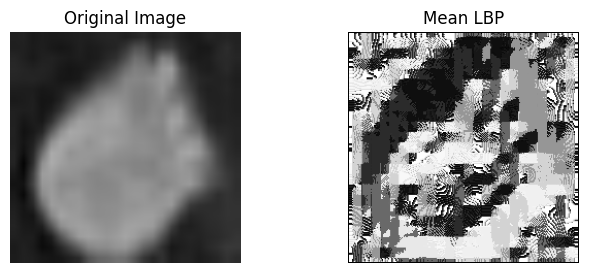

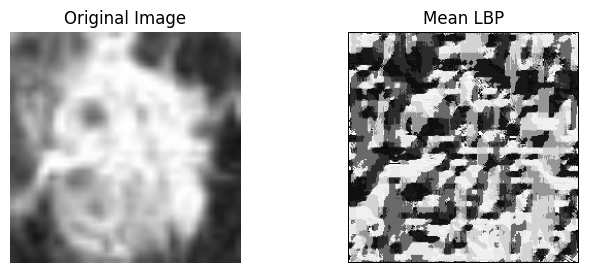

In [17]:
import cv2 as img_lib
import numpy as np
import matplotlib.pyplot as plt

# Paths to input images for processing
file_paths = [
    r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-1920/VIBRANT+C1/p-048.jpg",
    r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-2024/SUB4/p-074.jpg",
    r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-1803/SUB4/p-046.jpg",
    r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-2133/SUB1/p-066.jpg",
    r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-1802/VIBRANT+C4/p-044.jpg"
]

# Function to calculate Local Binary Pattern (LBP) using the mean of neighboring pixels
def calculate_mean_lbp(input_img):
    grayscale_img = img_lib.cvtColor(input_img, img_lib.COLOR_BGR2GRAY)
    height, width = grayscale_img.shape
    lbp_result = np.zeros((height, width), dtype=np.uint8)

    # Iterate over each pixel, excluding border pixels
    for x in range(1, height - 1):
        for y in range(1, width - 1):
            center_pixel = grayscale_img[x, y]
            surrounding_pixels = [
                grayscale_img[x-1, y-1], grayscale_img[x-1, y], grayscale_img[x-1, y+1],
                grayscale_img[x, y-1],                    grayscale_img[x, y+1],
                grayscale_img[x+1, y-1], grayscale_img[x+1, y], grayscale_img[x+1, y+1]
            ]
            
            # Calculate mean of neighboring pixels and compare with center
            avg_value = np.mean(surrounding_pixels)
            binary_code = ''.join(['1' if px >= avg_value else '0' for px in surrounding_pixels])
            lbp_result[x, y] = int(binary_code, 2)
    
    return lbp_result

# Processing and visualizing each image
for path in file_paths:
    img = img_lib.imread(path)
    if img is None:
        print(f"Failed to load image at {path}.")
        continue

    resized_img = img_lib.resize(img, (224, 224))
    lbp_image = calculate_mean_lbp(resized_img)  # Apply mean LBP function

    # Display original and processed images side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))
    axes[0].imshow(img_lib.cvtColor(resized_img, img_lib.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')

    axes[1].imshow(lbp_image, cmap='gray')
    axes[1].set_title('Mean LBP')
    axes[1].axis('off')

    plt.show()


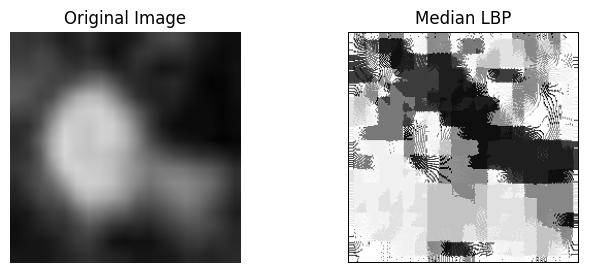

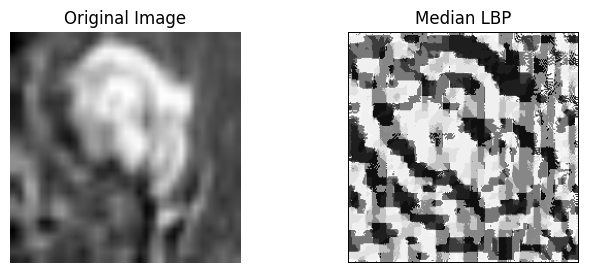

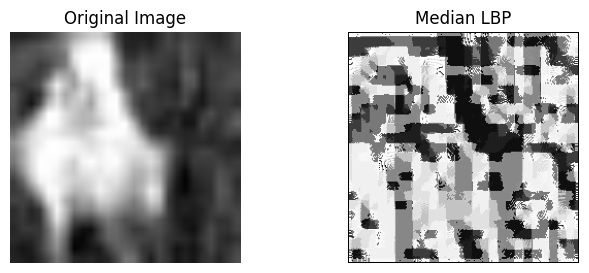

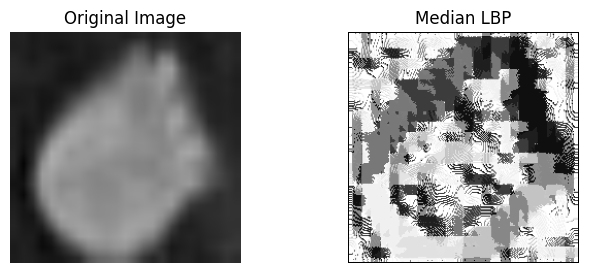

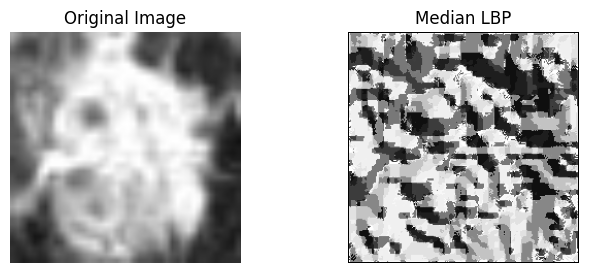

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# File paths to input images
image_files = [
    r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-1920/VIBRANT+C1/p-048.jpg",
    r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-2024/SUB4/p-074.jpg",
    r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-1803/SUB4/p-046.jpg",
    r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-2133/SUB1/p-066.jpg",
    r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-1802/VIBRANT+C4/p-044.jpg"
]

# Function to calculate Median-based Local Binary Pattern (LBP)
def compute_median_lbp(input_image):
    gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    height, width = gray_image.shape
    lbp_image = np.zeros((height, width), dtype=np.uint8)
    
    for x in range(1, height - 1):
        for y in range(1, width - 1):
            pixel_value = gray_image[x, y]
            neighborhood_pixels = [
                gray_image[x-1, y], gray_image[x-1, y+1], gray_image[x, y+1],
                gray_image[x+1, y+1], gray_image[x+1, y], gray_image[x+1, y-1],
                gray_image[x, y-1], gray_image[x-1, y-1]
            ]
            
            median_value = np.median(neighborhood_pixels)
            binary_string = ''.join(['1' if neighbor >= median_value else '0' for neighbor in neighborhood_pixels])
            lbp_image[x, y] = int(binary_string, 2)
    
    return lbp_image

# Loop through each image, process, and visualize
for file_path in image_files:
    img = cv2.imread(file_path)
    if img is None:
        print(f"Unable to load image at {file_path}")
        continue
    
    resized_img = cv2.resize(img, (224, 224))
    lbp_result = compute_median_lbp(resized_img)  # Compute median LBP

    # Display original and LBP images side-by-side
    fig, axes = plt.subplots(1, 2, figsize=(8, 3))
    axes[0].imshow(cv2.cvtColor(resized_img, cv2.COLOR_BGR2RGB))
    axes[0].set_title('Original Image')
    axes[0].axis('off')
    
    axes[1].imshow(lbp_result, cmap='gray')
    axes[1].set_title('Median LBP')
    axes[1].axis('off')
    
    plt.show()


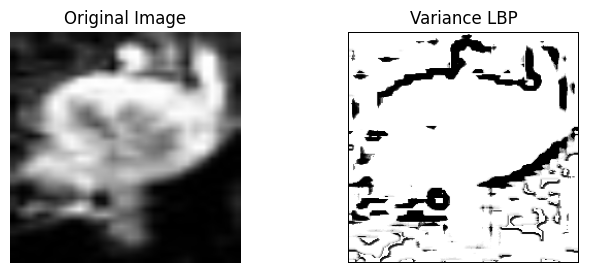

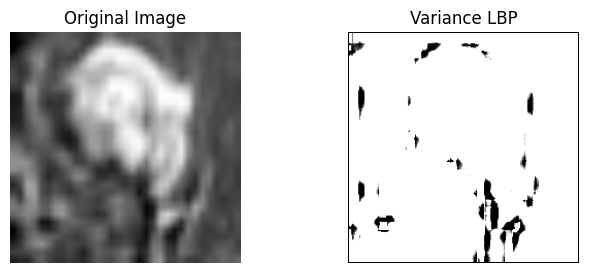

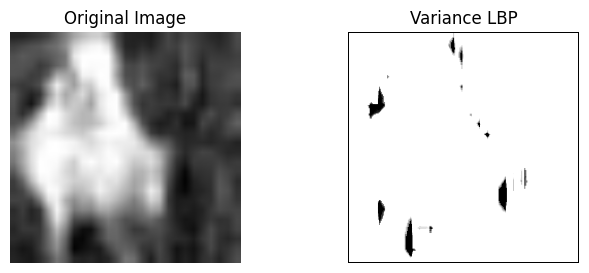

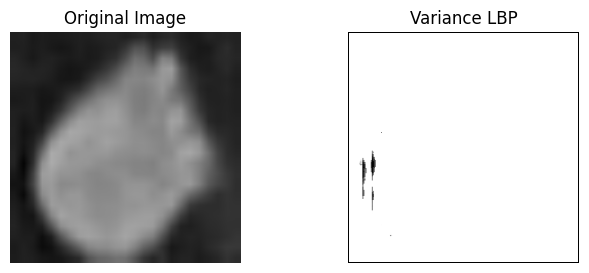

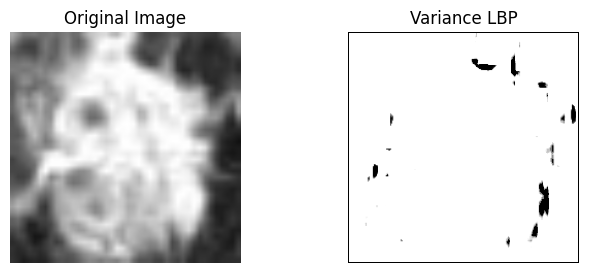

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# File paths of images
image_files = [
    r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-1926/SUB1/p-040.jpg",
    r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-2024/SUB4/p-074.jpg",
    r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-1803/SUB4/p-046.jpg",
    r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-2133/SUB1/p-066.jpg",
    r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-1802/VIBRANT+C4/p-044.jpg" 
]

# Function to calculate variance-based Local Binary Pattern (LBP)
def calculate_variance_lbp(image):
    # Convert to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    rows, cols = gray.shape
    variance_lbp_image = np.zeros((rows, cols), dtype=np.uint8)
    
    # Compute variance LBP
    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            center_pixel = gray[i, j]
            neighborhood = [
                gray[i - 1, j - 1], gray[i - 1, j], gray[i - 1, j + 1],
                gray[i, j + 1],                  gray[i + 1, j + 1],
                gray[i + 1, j], gray[i + 1, j - 1], gray[i, j - 1]
            ]
            
            # Calculate local variance
            local_variance = np.var(neighborhood)
            binary_string = ''.join(['1' if pixel >= local_variance else '0' for pixel in neighborhood])
            variance_lbp_image[i, j] = int(binary_string, 2)
    
    return variance_lbp_image

# Process and display each image
for img_path in image_files:
    # Load the image
    image = cv2.imread(img_path)
    if image is None:
        print(f"Could not load image at {img_path}.")
        continue
    
    # Resize the image for processing
    image = cv2.resize(image, (224, 224))
    
    # Calculate the variance LBP
    var_lbp_image = calculate_variance_lbp(image)
    
    # Display original and processed images side-by-side
    fig, ax = plt.subplots(1, 2, figsize=(8, 3))
    ax[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    ax[0].set_title('Original Image')
    ax[0].axis('off')
    ax[1].imshow(var_lbp_image, cmap='gray')
    ax[1].set_title('Variance LBP')
    ax[1].axis('off')
    plt.show()


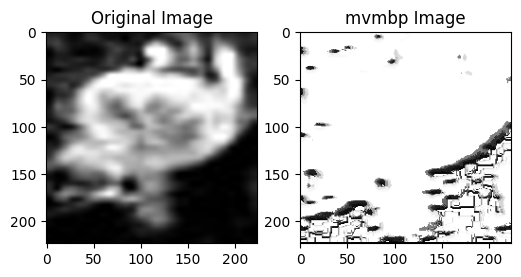

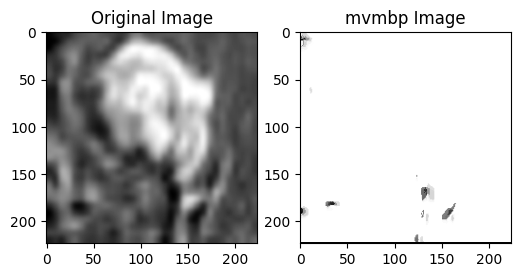

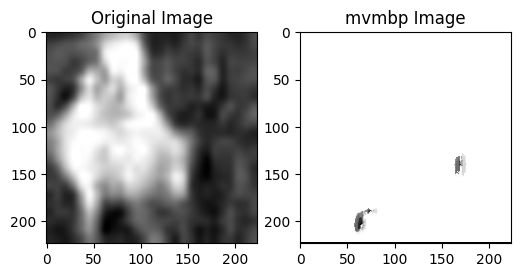

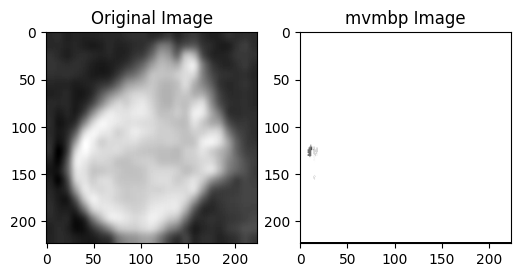

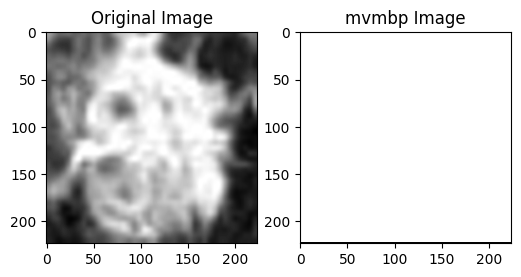

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Updated image paths
image_files = [
    r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-1926/SUB1/p-040.jpg",
    r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-2024/SUB4/p-074.jpg",
    r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-1803/SUB4/p-046.jpg",
    r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-2133/SUB1/p-066.jpg",
    r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-1802/VIBRANT+C4/p-044.jpg" 
]

# mvmbp function definition
def mvmbp(image_path):
    image = Image.open(image_path).convert('L')
    image = image.resize((224, 224))
    image_array = np.array(image)
    rows, cols = image_array.shape
    lbp_image = np.zeros((rows, cols), dtype=np.uint8)

    for i in range(1, rows - 1):
        for j in range(1, cols - 1):
            neighborhood = image_array[i-1:i+2, j-1:j+2]
            center_pixel = image_array[i, j]
            neighborhood = neighborhood.flatten()
            neighborhood = np.delete(neighborhood, 4)
            median = np.median(neighborhood)
            mean = np.mean(neighborhood)
            variance = np.var(neighborhood)
            threshold = (median + np.sqrt(variance) + mean) / 3
            surrounding_pixels = np.delete(neighborhood, 4)
            binary_pattern = 0

            for ind in range(8):
                if neighborhood[ind] >= threshold:
                    binary_pattern += 2**ind
            lbp_image[i, j] = binary_pattern

    lbp_image_normalized = (lbp_image / lbp_image.max()) * 255

    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(image_array, cmap='gray')
    plt.title('Original Image')

    plt.subplot(1, 2, 2)
    plt.imshow(lbp_image_normalized, cmap='gray')
    plt.title('mvmbp Image')
    plt.show()

# Process each image in image_files
for img_path in image_files:
    mvmbp(img_path)


In [21]:
import numpy as np

def calculate_glcm(matrix, dx=1, dy=0, intensity_levels=[0, 1, 2, 3]):
    num_levels = len(intensity_levels)
    glcm = np.zeros((num_levels, num_levels), dtype=int)

    rows, cols = matrix.shape

    for i in range(rows):
        for j in range(cols):
            if 0 <= i + dy < rows and 0 <= j + dx < cols:
                current_value = matrix[i, j]
                right_value = matrix[i + dy, j + dx]
                glcm[current_value, right_value] += 1

    return glcm

# Example usage
matrix = np.array([
    [0, 1, 2, 3],
    [1, 0, 3, 2],
    [2, 3, 0, 1],
    [3, 2, 1, 0]
])

glcm = calculate_glcm(matrix, dx=1, dy=0)

print("GLCM Matrix (horizontal):")
print(glcm)


GLCM Matrix (horizontal):
[[0 2 0 1]
 [2 0 1 0]
 [0 1 0 2]
 [1 0 2 0]]


In [22]:
import numpy as np
import cv2
import os

def calculate_glcm(matrix, dx=1, dy=0, intensity_levels=[0, 1, 2, 3]):
    num_levels = len(intensity_levels)
    glcm = np.zeros((num_levels, num_levels), dtype=int)

    rows, cols = matrix.shape

    for i in range(rows):
        for j in range(cols):
            if 0 <= i + dy < rows and 0 <= j + dx < cols:
                current_value = matrix[i, j]
                right_value = matrix[i + dy, j + dx]
                glcm[current_value, right_value] += 1

    return glcm

# Load and preprocess the image
image_path = r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-1818/SUB8/p-028.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resize or normalize the image pixel values if needed
# In this example, we will assume that the pixel values range from 0 to 255, so we map them to a limited range.
# For simplicity, we map pixel values to 4 intensity levels (0, 1, 2, 3).
num_levels = 4
image = (image / (256 / num_levels)).astype(int)

# Calculate the GLCM
glcm = calculate_glcm(image, dx=1, dy=0, intensity_levels=list(range(num_levels)))

print("GLCM Matrix (horizontal):")
print(glcm)


GLCM Matrix (horizontal):
[[178  49   0   0]
 [ 45 103  26   2]
 [  1  24  44  22]
 [  0   3  21 207]]


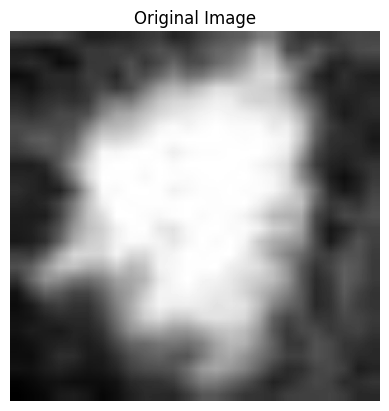

GLCM Matrix (horizontal):
[[178  49   0   0]
 [ 45 103  26   2]
 [  1  24  44  22]
 [  0   3  21 207]]


In [23]:
import numpy as np
import cv2
import os
from matplotlib import pyplot as plt

def calculate_glcm(matrix, dx=1, dy=0, intensity_levels=[0, 1, 2, 3]):
    num_levels = len(intensity_levels)
    glcm = np.zeros((num_levels, num_levels), dtype=int)

    rows, cols = matrix.shape

    for i in range(rows):
        for j in range(cols):
            if 0 <= i + dy < rows and 0 <= j + dx < cols:
                current_value = matrix[i, j]
                right_value = matrix[i + dy, j + dx]
                glcm[current_value, right_value] += 1

    return glcm

# Load the image in grayscale
image_path = r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-1818/SUB8/p-028.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Resize the original image to 224x224
resized_image = cv2.resize(image, (224, 224))

# Display the resized image
plt.imshow(resized_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Normalize pixel values for GLCM calculation (e.g., 4 intensity levels: 0, 1, 2, 3)
num_levels = 4
normalized_image = (image / (256 / num_levels)).astype(int)

# Calculate the GLCM
glcm = calculate_glcm(normalized_image, dx=1, dy=0, intensity_levels=list(range(num_levels)))

print("GLCM Matrix (horizontal):")
print(glcm)


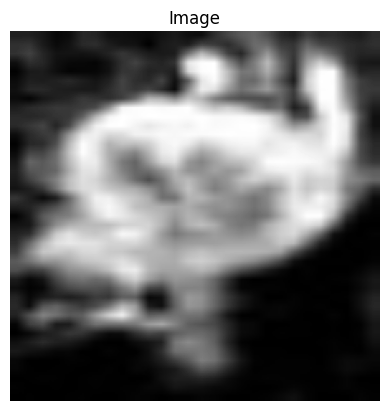

GLCM Matrix (horizontal):
[[434  48   7   5]
 [ 56  76  43   4]
 [  4  46 111  44]
 [  0   9  44 176]]




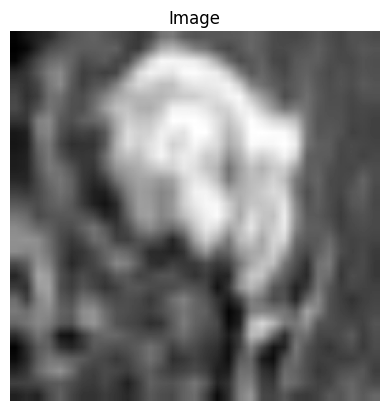

GLCM Matrix (horizontal):
[[ 84  87   8   0]
 [ 80 400  43   0]
 [  0  48  56  36]
 [  0   6  30 114]]




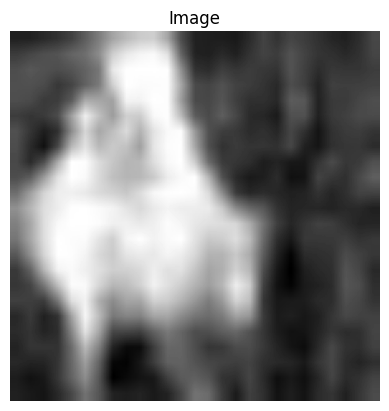

GLCM Matrix (horizontal):
[[172  57   3   0]
 [ 55  87  18   3]
 [  5  18  23  30]
 [  0   3  30 120]]




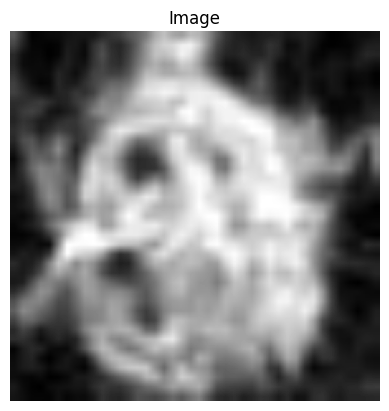

GLCM Matrix (horizontal):
[[480  60   5   0]
 [ 65 140  69   3]
 [  1  73 274  67]
 [  0   1  69 292]]




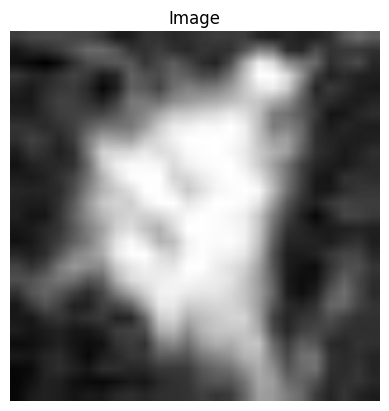

GLCM Matrix (horizontal):
[[222  53   1   0]
 [ 55 101  26   3]
 [  0  26  38  23]
 [  0   4  22 151]]




In [24]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def calculate_glcm(matrix, dx=1, dy=0, intensity_levels=[0, 1, 2, 3]):
    num_levels = len(intensity_levels)
    glcm = np.zeros((num_levels, num_levels), dtype=int)

    rows, cols = matrix.shape

    for i in range(rows):
        for j in range(cols):
            if 0 <= i + dy < rows and 0 <= j + dx < cols:
                current_value = matrix[i, j]
                right_value = matrix[i + dy, j + dx]
                glcm[current_value, right_value] += 1

    return glcm

# List of full image paths
image_paths = [
        r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-1926/SUB1/p-040.jpg",
        r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-2024/SUB4/p-074.jpg",
        r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-1803/SUB4/p-046.jpg",
        r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-1802/SUB3/p-044.jpg",
        r"/kaggle/input/breast-cancer-mri/train/Malignant/BreaDM-Ma-1818/SUB8/p-029.jpg" 
]

# Parameters for GLCM calculation
dx, dy = 1, 0  # Horizontal offset
num_levels = 4  # Number of intensity levels
intensity_levels = list(range(num_levels))

# Loop through each image path
for image_path in image_paths:
    # Load the image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        print(f"Could not load image: {image_path}")
        continue
    
    # Resize the original image to 224x224
    resized_image = cv2.resize(image, (224, 224))

    # Display the resized image
    plt.imshow(resized_image, cmap='gray')
    plt.title("Image")
    plt.axis('off')
    plt.show()

    # Normalize pixel values for GLCM calculation
    normalized_image = (image / (256 / num_levels)).astype(int)

    # Calculate the GLCM
    glcm = calculate_glcm(normalized_image, dx=dx, dy=dy, intensity_levels=intensity_levels)

    # Print the GLCM matrix
    print("GLCM Matrix (horizontal):")
    print(glcm)
    print("\n" + "="*50 + "\n")


# **CustomVGG16**

In [25]:
import torch
import torch.nn as nn
import torchvision.models as models

# Custom VGG16 class that inherits from nn.Module
class CustomVGG16(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomVGG16, self).__init__()
        
        vgg16 = models.vgg16()
        vgg16.load_state_dict(torch.load('/kaggle/input/customvgg16/pytorch/default/1/vgg16-397923af.pth', weights_only=True))

        
        # Extract the features and avgpool layers from the pretrained model
        self.features = vgg16.features
        self.avgpool = vgg16.avgpool
        
        # Define a new classifier using nn.Sequential
        self.classifier = nn.Sequential(
            nn.Linear(512 * 7 * 7, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, num_classes)
        )

    def forward(self, x):
        # Pass the input through the feature layers
        x = self.features(x)
        # Apply the average pooling layer
        x = self.avgpool(x)
        # Flatten the output to a 2D tensor
        x = torch.flatten(x, 1)
        # Pass the reshaped output through the custom classifier
        x = self.classifier(x)
        return x

# Printing the model
if __name__ == "__main__":
    model = CustomVGG16(num_classes=2)
    print(model)

CustomVGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, di

In [26]:
import torch

# Ensure that the CustomVGG16 class is already defined above or imported
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Initialize the model
model = CustomVGG16(num_classes=2)

# Move the model to the appropriate device (CPU or GPU)
model = model.to(device)

# Print the model to confirm
print(model)

CustomVGG16(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, di

# **EarlyStopping**

In [27]:
import numpy as np
import torch

class EarlyStopping:
    """Early stops the training if validation loss doesn't improve after a given patience."""
    def __init__(self, patience=7, verbose=False, delta=0, path='checkpoint.pt', trace_func=print):
        
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_score = None
        self.early_stop = False
        self.val_loss_min = np.inf
        self.delta = delta
        self.path = path
        self.trace_func = trace_func

    def __call__(self, val_loss, model):
        score = -val_loss

        if self.best_score is None:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
        elif score < self.best_score + self.delta:
            self.counter += 1
            if self.verbose:
                self.trace_func(f'EarlyStopping counter: {self.counter} out of {self.patience}')
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_score = score
            self.save_checkpoint(val_loss, model)
            self.counter = 0

    def save_checkpoint(self, val_loss, model):
        if self.verbose:
            self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
        torch.save(model.state_dict(), self.path)
        self.val_loss_min = val_loss

In [28]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)

#  **Train Function**

In [36]:
import torch

from tqdm import tqdm

import torch.nn.functional as F

def train(epoch, model, num_epochs, loader, criterion, l2_decay):
    learning_rate = max(lr * (0.1**(epoch / 10)), 1e-5)
    optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=l2_decay)
    
    model.train()
    correct = 0
    
    for data, label in tqdm(loader, desc=f'Epoch {epoch+1}/{num_epochs}', unit='batch'):
        data = data.float().cuda()
        label = label.long().cuda()
        
        output = model(data)
        optimizer.zero_grad()
        loss = F.nll_loss(F.log_softmax(output, dim=1), label)
        loss.backward()
        optimizer.step()
        
        pred = output.data.max(1)[1]
        correct += pred.eq(label.data.view_as(pred)).cpu().sum()
    
    print(f'train accuracy: {100. * correct / len(loader.dataset)}%')


# **Validation Function**

In [48]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve
import numpy as np

def val(model):
    name = 'validation'
    len_valloader = len(valloader.dataset)
    model.eval()
    val_loss = 0
    correct = 0
    all_predictions = []
    all_targets = []  # To store all ground truth labels across batches
    possibilities = None

    for data, target in valloader:  # Use valloader as the validation data loader
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        
        val_output = model(data)
        val_loss += F.nll_loss(F.log_softmax(val_output, dim=1), target, reduction='sum').item()
        pred = val_output.data.max(1)[1]
        
        # Collect predictions and targets
        all_predictions.extend(pred.cpu().numpy())
        all_targets.extend(target.cpu().numpy())

        # Convert the output to probabilities using softmax
        possibility = F.softmax(val_output, dim=1).cpu().data.numpy()
        if possibilities is None:
            possibilities = possibility
        else:
            possibilities = np.concatenate((possibilities, possibility), axis=0)

        correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    # Compute the confusion matrix using all_targets and all_predictions
    cm = metrics.confusion_matrix(all_targets, all_predictions)

    # One-hot encode the labels for AUC computation
    num_classes = val_output.shape[1]
    target_onehot = np.eye(num_classes)[np.array(all_targets).astype(int).tolist()]

    val_loss /= len_valloader
    fpr, tpr, _ = roc_curve(all_targets, possibilities[:, 1])  # Assuming binary classification
    auc_value = roc_auc_score(all_targets, possibilities[:, 1])

    print('Specificity: {:.4f}, Sensitivity: {:.4f}, AUC: {:.4f}'.format(1 - fpr[0], tpr[0], auc_value))
    print('\n{} set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        name, val_loss, correct, len_valloader,
        100. * correct / len_valloader))

    return 100. * correct / len_valloader, val_loss, auc_value


# **Model Training**

In [46]:
total_epochs = 50
lr = 0.01
best_accuracy = 0
momentum = 0.9
no_cuda = False
num_classes = 2
log_interval = 10
l2_decay = 0.01

trainloader = torch.utils.data.DataLoader(train_ds,batch_size=batch_size,shuffle=True,num_workers=2)  
valloader = torch.utils.data.DataLoader(val_ds,batch_size=batch_size,shuffle=True,num_workers=2)

criterion = torch.nn.CrossEntropyLoss()

model = CustomVGG16(num_classes=num_classes)

model = model.to(device)
# model.to(device)  # here cuda device
num_classes = 2
# model = CustomVGG16(num_classes=num_classes)




In [51]:
import os
# Model training
model.to(device)  # here device is cuda
highest_auc = 0
early_stopping = EarlyStopping(patience=20, verbose=True)

project_directory = 'tumor_classification'
model_type = 'vgg16'

# Directory to save model checkpoints
save_directory = os.path.join('model', project_directory, model_type)
if not os.path.exists(save_directory):
    os.makedirs(save_directory)

# Training loop for a specified number of epochs
for current_epoch in range(1, total_epochs + 1):
    # Now pass all required arguments to the train function
    train(current_epoch, model, total_epochs, trainloader, criterion, l2_decay)
    
    # Evaluation with no gradient calculations
    with torch.no_grad():
        accuracy, val_loss, auc_score = val(model)
        
        # Handle multi-GPU setups if applicable
        model_state_dict = (
            model.module.state_dict() 
            if isinstance(model, nn.parallel.DistributedDataParallel) 
            else model.state_dict()
        )
        
        # Save the model if AUC score improves
        if auc_score > highest_auc:
            highest_auc = auc_score  # Update highest AUC score
            checkpoint_path = os.path.join(save_directory, f'{model_type}_{current_epoch}.pth')
            torch.save(model_state_dict, checkpoint_path, _use_new_zipfile_serialization=False)
            print(f"Model checkpoint saved at epoch {current_epoch} with AUC: {highest_auc:.4f}")

        # Early stopping based on validation loss
        early_stopping(val_loss, model)  # test_loss should be updated in each validation
        if early_stopping.early_stop:
            print("Early stopping triggered")
            break

Epoch 2/50: 100%|██████████| 639/639 [02:40<00:00,  3.97batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.8605

validation set: Average loss: 0.5209, Accuracy: 1581/1989 (79.49%)

Model checkpoint saved at epoch 1 with AUC: 0.8605
Validation loss decreased (inf --> 0.520908).  Saving model ...


Epoch 3/50: 100%|██████████| 639/639 [02:40<00:00,  3.97batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.7676

validation set: Average loss: 0.5126, Accuracy: 1581/1989 (79.49%)

Validation loss decreased (0.520908 --> 0.512619).  Saving model ...


Epoch 4/50: 100%|██████████| 639/639 [02:40<00:00,  3.97batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.5000

validation set: Average loss: 0.5189, Accuracy: 1581/1989 (79.49%)

EarlyStopping counter: 1 out of 20


Epoch 5/50: 100%|██████████| 639/639 [02:40<00:00,  3.97batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.5000

validation set: Average loss: 0.5177, Accuracy: 1581/1989 (79.49%)

EarlyStopping counter: 2 out of 20


Epoch 6/50: 100%|██████████| 639/639 [02:40<00:00,  3.97batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.5000

validation set: Average loss: 0.5226, Accuracy: 1581/1989 (79.49%)

EarlyStopping counter: 3 out of 20


Epoch 7/50: 100%|██████████| 639/639 [02:41<00:00,  3.97batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.5000

validation set: Average loss: 0.5226, Accuracy: 1581/1989 (79.49%)

EarlyStopping counter: 4 out of 20


Epoch 8/50: 100%|██████████| 639/639 [02:41<00:00,  3.96batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.5000

validation set: Average loss: 0.5198, Accuracy: 1581/1989 (79.49%)

EarlyStopping counter: 5 out of 20


Epoch 9/50: 100%|██████████| 639/639 [02:41<00:00,  3.96batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.5000

validation set: Average loss: 0.5201, Accuracy: 1581/1989 (79.49%)

EarlyStopping counter: 6 out of 20


Epoch 10/50: 100%|██████████| 639/639 [02:41<00:00,  3.96batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.5000

validation set: Average loss: 0.5213, Accuracy: 1581/1989 (79.49%)

EarlyStopping counter: 7 out of 20


Epoch 11/50: 100%|██████████| 639/639 [02:40<00:00,  3.97batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.5000

validation set: Average loss: 0.5224, Accuracy: 1581/1989 (79.49%)

EarlyStopping counter: 8 out of 20


Epoch 12/50: 100%|██████████| 639/639 [02:41<00:00,  3.97batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.5000

validation set: Average loss: 0.5214, Accuracy: 1581/1989 (79.49%)

EarlyStopping counter: 9 out of 20


Epoch 13/50: 100%|██████████| 639/639 [02:40<00:00,  3.97batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.5000

validation set: Average loss: 0.5208, Accuracy: 1581/1989 (79.49%)

EarlyStopping counter: 10 out of 20


Epoch 14/50: 100%|██████████| 639/639 [02:40<00:00,  3.97batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.5000

validation set: Average loss: 0.5211, Accuracy: 1581/1989 (79.49%)

EarlyStopping counter: 11 out of 20


Epoch 15/50: 100%|██████████| 639/639 [02:40<00:00,  3.97batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.5000

validation set: Average loss: 0.5207, Accuracy: 1581/1989 (79.49%)

EarlyStopping counter: 12 out of 20


Epoch 16/50: 100%|██████████| 639/639 [02:41<00:00,  3.97batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.5000

validation set: Average loss: 0.5212, Accuracy: 1581/1989 (79.49%)

EarlyStopping counter: 13 out of 20


Epoch 17/50: 100%|██████████| 639/639 [02:40<00:00,  3.97batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.5000

validation set: Average loss: 0.5215, Accuracy: 1581/1989 (79.49%)

EarlyStopping counter: 14 out of 20


Epoch 18/50: 100%|██████████| 639/639 [02:40<00:00,  3.97batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.5000

validation set: Average loss: 0.5213, Accuracy: 1581/1989 (79.49%)

EarlyStopping counter: 15 out of 20


Epoch 19/50: 100%|██████████| 639/639 [02:40<00:00,  3.97batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.5000

validation set: Average loss: 0.5212, Accuracy: 1581/1989 (79.49%)

EarlyStopping counter: 16 out of 20


Epoch 20/50: 100%|██████████| 639/639 [02:41<00:00,  3.97batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.5000

validation set: Average loss: 0.5211, Accuracy: 1581/1989 (79.49%)

EarlyStopping counter: 17 out of 20


Epoch 21/50: 100%|██████████| 639/639 [02:41<00:00,  3.97batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.5000

validation set: Average loss: 0.5211, Accuracy: 1581/1989 (79.49%)

EarlyStopping counter: 18 out of 20


Epoch 22/50: 100%|██████████| 639/639 [02:40<00:00,  3.97batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.5000

validation set: Average loss: 0.5211, Accuracy: 1581/1989 (79.49%)

EarlyStopping counter: 19 out of 20


Epoch 23/50: 100%|██████████| 639/639 [02:40<00:00,  3.97batch/s]

train accuracy: 72.79534149169922%


Specificity: 1.0000, Sensitivity: 0.0000, AUC: 0.5000

validation set: Average loss: 0.5211, Accuracy: 1581/1989 (79.49%)

EarlyStopping counter: 20 out of 20
Early stopping triggered


# **Test Function**

In [6]:
import torch
import torch.nn.functional as F
from sklearn import metrics
from sklearn.metrics import roc_auc_score, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt

# Plot AUC function
def plot_auc(target, possibilities):
    fpr, tpr, _ = roc_curve(target, possibilities[:, 1])  # assumes binary classification
    auc_value = auc(fpr, tpr)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {auc_value:.4f}')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()
    return auc_value

# Plot confusion matrix function
def plot_confusion_matrix(cm, labels):
    fig, ax = plt.subplots()
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Test function
def test(model, testloader):
    name = 'test'
    len_testloader = len(testloader.dataset)
    model.eval()
    test_loss = 0
    correct = 0
    possibilities = None
    all_predictions = []
    all_targets = []
    label_names = ['benign', 'malignant']

    for data, target in testloader:
        if torch.cuda.is_available():
            data, target = data.cuda(), target.cuda()
        
        # Forward pass
        test_output = model(data)
        test_loss += F.nll_loss(F.log_softmax(test_output, dim=1), target, reduction='sum').item()
        
        # Get predictions
        _, pred = test_output.data.max(1)
        all_predictions.append(pred.cpu().numpy())
        all_targets.append(target.cpu().numpy())
        
        # Softmax probabilities for AUC
        possibility = F.softmax(test_output, dim=1).cpu().data.numpy()
        if possibilities is None:
            possibilities = possibility
        else:
            possibilities = np.concatenate((possibilities, possibility), axis=0)
        
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()
    
    # Flatten the predictions and targets
    all_predictions = np.concatenate(all_predictions)
    all_targets = np.concatenate(all_targets)

    # Classification metrics
    print(metrics.classification_report(all_targets, all_predictions, target_names=label_names, digits=4))

    # Confusion matrix
    cm = metrics.confusion_matrix(all_targets, all_predictions)
    print('Confusion Matrix:')
    print(cm)
    plot_confusion_matrix(cm, label_names)
    
    # AUC calculation and plot
    auc_value = plot_auc(all_targets, possibilities)
    
    # Output Specificity, Sensitivity, and AUC
    fpr, tpr, _ = roc_curve(all_targets, possibilities[:, 1])
    print(f'Specificity: {1 - fpr[0]:.4f}, Sensitivity: {tpr[0]:.4f}, AUC: {auc_value:.4f}')
    
    # Average loss and accuracy
    print(f'\n{name} set: Average loss: {test_loss / len_testloader:.4f}, Accuracy: {correct}/{len_testloader} ({100. * correct / len_testloader:.2f}%)\n')

    return 100. * correct / len_testloader, test_loss / len_testloader, auc_value


# **Resnet18 Model**

In [3]:
import torch
import torch.nn as nn
import torchvision.models as models

# Custom ResNet18 class that inherits from nn.Module
class CustomResnet18(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomResnet18, self).__init__()
        
        # Load the pretrained ResNet18 model
        model_resnet18 = models.resnet18(pretrained=True)
        
        # Extract layers from pretrained model
        self.conv1 = model_resnet18.conv1       # initial convolutional layer
        self.bn1 = model_resnet18.bn1           # batch normalization layer
        self.relu = model_resnet18.relu         # ReLU activation function
        self.maxpool = model_resnet18.maxpool   # max pooling layer
        
        # ResNet blocks for feature extraction
        self.layer1 = model_resnet18.layer1
        self.layer2 = model_resnet18.layer2
        self.layer3 = model_resnet18.layer3
        self.layer4 = model_resnet18.layer4     # deeper layers for increasing depth of the network
        
        # Average pooling layer
        self.avgpool = model_resnet18.avgpool
        
        # Replace the fully connected layer for custom number of classes
        self._features = model_resnet18.fc.in_features
        self.fc = nn.Linear(self._features, num_classes)

    def forward(self, x):
        x = self.conv1(x)                       # apply convolutional layer
        x = self.bn1(x)                         # apply batch normalization
        x = self.relu(x)                        # apply ReLU activation
        x = self.maxpool(x)                     # apply max pooling
        x = self.layer1(x)                      # pass through ResNet layer 1
        x = self.layer2(x)                      # pass through ResNet layer 2
        x = self.layer3(x)                      # pass through ResNet layer 3
        x = self.layer4(x)                      # pass through ResNet layer 4
        x = self.avgpool(x)                     # apply average pooling
        x = x.view(x.size(0), -1)               # flatten for the fully connected layer
        x = self.fc(x)                          # apply fully connected layer for output
        return x

# Print the model architecture
if __name__ == "__main__":
    model1 = CustomResnet18(num_classes=2)
    print(model1)


CustomResnet18(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=

# **Resnet50 Model**

In [5]:
import torch
import torch.nn as nn
import torchvision.models as models

# Custom ResNet50 class that inherits from nn.Module
class CustomResnet50(nn.Module):
    def __init__(self, num_classes=2):
        super(CustomResnet50, self).__init__()
        
        # Load the pretrained ResNet50 model
        model_resnet50 = models.resnet50(pretrained=True)
        
        # Extract layers from the pretrained model
        self.conv1 = model_resnet50.conv1        # initial convolutional layer
        self.bn1 = model_resnet50.bn1            # batch normalization layer
        self.relu = model_resnet50.relu          # ReLU activation function
        self.maxpool = model_resnet50.maxpool    # max pooling layer
        
        # ResNet blocks for feature extraction
        self.layer1 = model_resnet50.layer1
        self.layer2 = model_resnet50.layer2
        self.layer3 = model_resnet50.layer3
        self.layer4 = model_resnet50.layer4      # deeper layers for increasing depth of the network
        
        # Average pooling layer
        self.avgpool = model_resnet50.avgpool
        
        # Replace the fully connected layer for custom number of classes
        self._features = model_resnet50.fc.in_features
        self.fc = nn.Linear(self._features, num_classes)

    def forward(self, x):
        x = self.conv1(x)                        # apply convolutional layer
        x = self.bn1(x)                          # apply batch normalization
        x = self.relu(x)                         # apply ReLU activation
        x = self.maxpool(x)                      # apply max pooling
        x = self.layer1(x)                       # pass through ResNet layer 1
        x = self.layer2(x)                       # pass through ResNet layer 2
        x = self.layer3(x)                       # pass through ResNet layer 3
        x = self.layer4(x)                       # pass through ResNet layer 4
        x = self.avgpool(x)                      # apply average pooling
        x = x.view(x.size(0), -1)                # flatten for the fully connected layer
        x = self.fc(x)                           # apply fully connected layer for output
        return x

# Print the model architecture
if __name__ == "__main__":
    model2 = CustomResnet50(num_classes=2)
    print(model2)


CustomResnet50(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), str